# **Project Introduction**

Our project will do an in-depth analysis of Chicago traffic data, that will provide drivers with relevant information to keep them safe on the road. We will explore how factors such as weather, visibility, driver alertness, time, and vehicles affect traffic crashes.

# **Changes since the proposal**

For our proposal, we decided to focus on three major American cities: Chicago, Los Angeles, and New York. We decided to change the scope to focus on Chicago data only, because the data that was in the other cities was not consistent, and they were not as in-depth as the Chicago dataset was. The Chicago data portal offers three very detailed data sets that will provide a better analysis than our previously proposed scope. Changing our scope to focusing on Chicago data will allow us to focus our efforts on analyzing the data instead of spending lots of time cleaning the three separate cities’ data sets and trying to pull common relevant information from each.

# **Data**

### Explanation of each data set:

**Traffic Crashes - Crashes:**
> “Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of the Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data )

We plan on using this data set to provide analysis on crash information such as lighting and road conditions, posted speed limits, contributing causes of the crash, as well as specific coordinates of the incident. This will provide us with the means to create heat maps of various traffic accidents by locations and an analysis of damages. Utilizing the Chicago data portal will also allow a wider analysis of the following Traffic Crash data sets via a crash_record_id column that is present in all three data sets. 

**Traffic Crashes - Vehicles:** 
> “This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset will be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units.” ( description provided by:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data )

The Vehicles data set will provide us information on the make and model of the car, as well as information about the vehicle at the time of the crash. This includes direction of travel, any known defects, where contact was made with the vehicle, as well as any maneuver the driver may have executed. This data set also includes information regarding whether the parties of the incident were pedestrians, bicyclists, or drivers. 

**Traffic Crashes - People:**
> “This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been occupants in a motor vehicle, but may have been a pedestrians, bicyclists, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data )

The People data set tracks several metrics such as the class of driver’s license possessed, whether a safety belt was used, or whether airbags were deployed. This data set will be instrumental in our analysis of the human factor of these crashes, as well as quantifying impact and safety of driving practices. We will also be able to use the crash_record_id to perform any analysis of crash records based on age or sex, which will also be important for our hypotheses and exploratory analysis.

### Cleaning the data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

crashes_df = pd.read_csv('../data/chicago.csv')

# Exploratory Data Analyses

### EDA Of the number of units involved in a crash - Jackson Weisner

The following bar charts visualize the number of units that are involved in crashes. This shows us that the most frequent number of units involved in crashes is 2. There are fewer crashes where number of units exceeds 3.

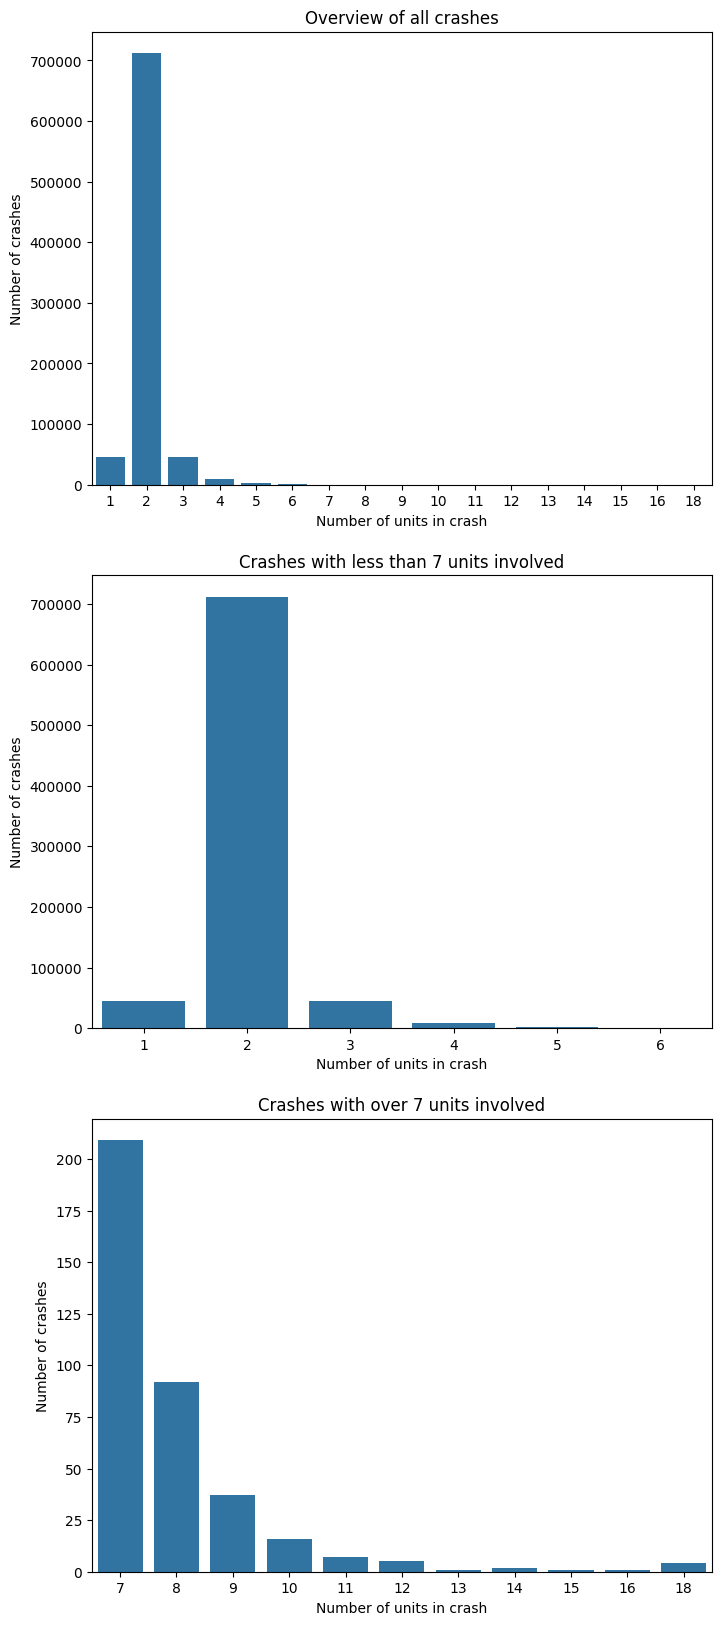

In [17]:
num_units_count = crashes_df.groupby('NUM_UNITS')['NUM_UNITS'].count()

split_counts = lambda b : crashes_df[b].groupby('NUM_UNITS')['NUM_UNITS'].count()
num_units_below_t = split_counts(crashes_df['NUM_UNITS'] < 7)
num_units_above_t = split_counts(crashes_df['NUM_UNITS'] >= 7)

figure, ax = plt.subplots(3, 1, figsize=(8,20))

plot_1 = sns.barplot(num_units_count, ax=ax[0])
plot_2 = sns.barplot(num_units_below_t, ax=ax[1])
plot_3 = sns.barplot(num_units_above_t, ax=ax[2])

def set_plot_styles(plot, title):
    plot.set_title(title)
    plot.set_ylabel('Number of crashes')
    plot.set_xlabel('Number of units in crash')

set_plot_styles(plot_1, 'Overview of all crashes')
set_plot_styles(plot_2, 'Crashes with less than 7 units involved')
set_plot_styles(plot_3, 'Crashes with over 7 units involved')
plt.show()

### Pie charts of weather conditions in crashes

(description)

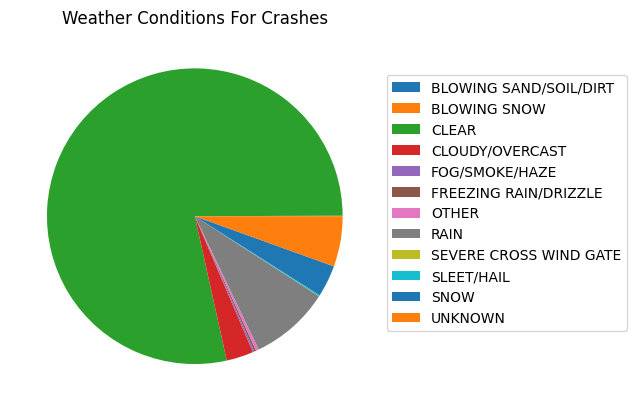

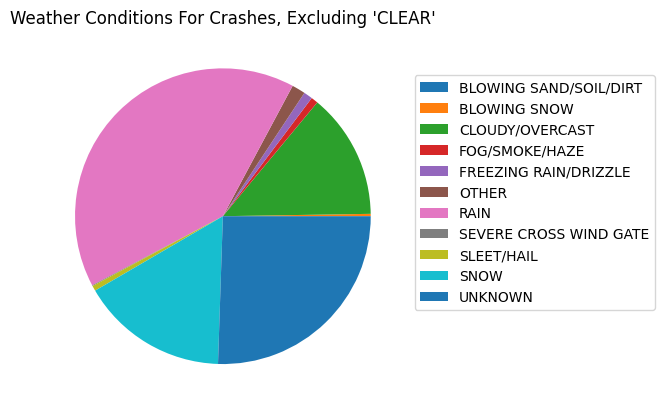

In [18]:
weather_condition_counts = crashes_df.groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
weather_excluding_clear = crashes_df[crashes_df['WEATHER_CONDITION'] != 'CLEAR'].groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
keys = [
    'BLOWING SAND/SOIL/DIRT',
    'BLOWING SNOW',
    'CLEAR',
    'CLOUDY/OVERCAST',
    'FOG/SMOKE/HAZE',
    'FREEZING RAIN/DRIZZLE',
    'OTHER',
    'RAIN',
    'SEVERE CROSS WIND GATE',
    'SLEET/HAIL',
    'SNOW',
    'UNKNOWN',
]


plt.figure(0)
plt.pie(weather_condition_counts, labels=None)
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes')

plt.figure(1)
plt.pie(weather_excluding_clear, labels=None)
keys.remove("CLEAR")
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes, Excluding \'CLEAR\'')

plt.show()

### EDA of Age and Gender - Erica Hammond

(description)

In [19]:
# various imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading data from Erica's PC
people_df = pd.read_csv('Traffic_Crashes_-_People_20240319.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Traffic_Crashes_-_People_20240319.csv'

### Age distribution involved in crashes

(description)

In [20]:
# Age Distribution
ages = people_df['AGE']

ages = ages[ages >= 0]

# top 10 
age_counts = pd.Series(ages).value_counts()
top_10_ages = age_counts.head(10).index

plt.figure(figsize=(17, 7))

# histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1), color='grey', kde=False)

# highlights
sns.histplot([age for age in ages if age in top_10_ages], bins=range(int(ages.min()), int(ages.max()) + 1), color='red', kde=False)
# sns.histplot([age for age in ages if age == 0], bins=range(int(ages.min()), int(ages.max()) + 1), color='black', kde=False)
# originally was going to label 0 as unknown age but realized it could indicate a high(er) number of crashes involving infants < 1 year old


plt.title('Age Distribution with Top 10 Ages Highlighted', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Individuals', fontsize=18)
plt.xlim(left=0)

plt.show()

# I don't know why it turned ugly... it was good earlier. I'll fix at a later date if needed.

NameError: name 'people_df' is not defined

### Gender distribution involved in crashes

(description)

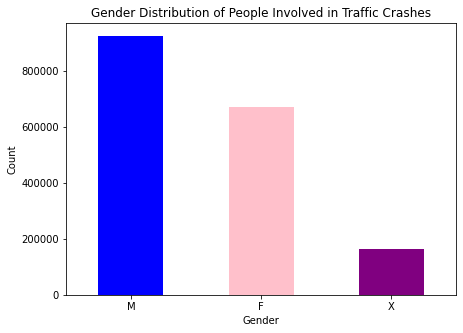

In [ ]:
# Gender distribution
gender_counts = people_df['SEX'].value_counts()
gender_colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}

plt.figure(figsize=(7, 5))
gender_counts.plot(kind='bar', color=[gender_colors[gender] for gender in gender_counts.index])
plt.title('Gender Distribution of People Involved in Traffic Crashes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

### Age x Gender

(description)

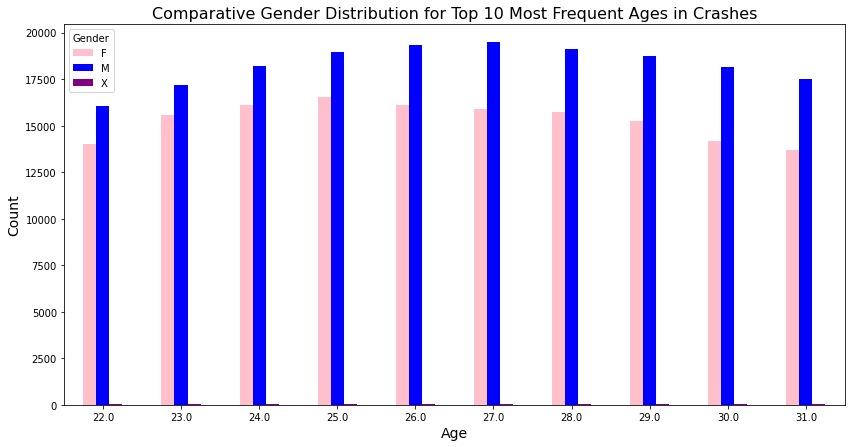

In [ ]:
# Gender distribution of the top 10 most frequent ages
age_data = people_df['AGE']
gender_data = people_df['SEX'].value_counts()
top_10_ages = people_df['AGE'].value_counts().head(10).index

# rows with ages in the top 10
top_10_df = people_df[people_df['AGE'].isin(top_10_ages)]

# group by 'AGE' and 'SEX'
grouped_data = top_10_df.groupby(['AGE', 'SEX']).size().unstack(fill_value=0)

colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}
grouped_data.plot(kind='bar', stacked=False, figsize=(14, 7), color=[colors[sex] for sex in grouped_data.columns])

plt.title('Comparative Gender Distribution for Top 10 Most Frequent Ages in Crashes', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()

## EDA of Hit and Runs and Crash Times - Mohammed Riaz

(description)

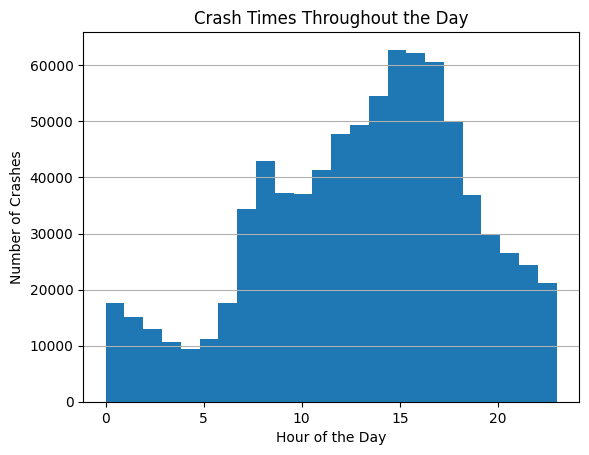

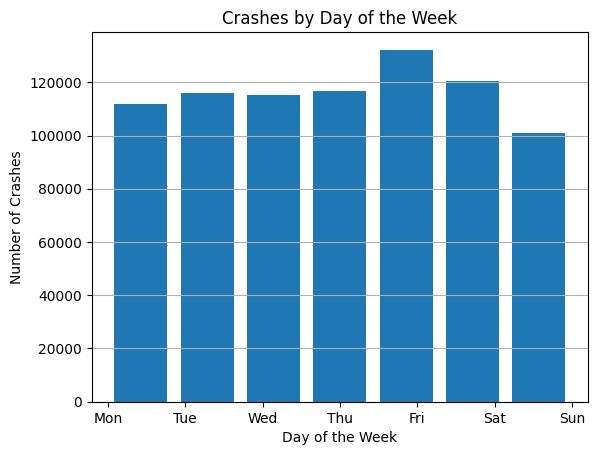

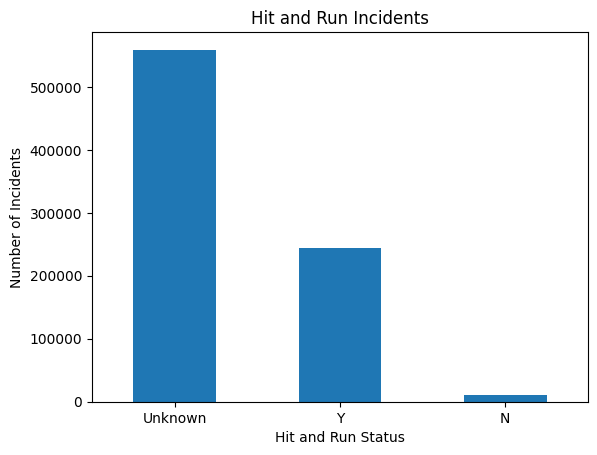

In [27]:
df_crashes = pd.read_csv('../data/chicago.csv')


df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

# Histogram of the hour of day when crashes occur
df_crashes['CRASH_HOUR'] = df_crashes['CRASH_DATE'].dt.hour
df_crashes['CRASH_HOUR'].plot(kind='hist', bins=24, title='Crash Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Histogram of the day of the week when crashes occur
df_crashes['CRASH_DAY_OF_WEEK'] = df_crashes['CRASH_DATE'].dt.dayofweek
df_crashes['CRASH_DAY_OF_WEEK'].plot(kind='hist', bins=7, rwidth=0.8, title='Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Bar chart for hit and runs
df_crashes['HIT_AND_RUN_I'] = df_crashes['HIT_AND_RUN_I'].fillna('Unknown')

hit_and_run_counts = df_crashes['HIT_AND_RUN_I'].value_counts()

hit_and_run_counts.plot(kind='bar', title='Hit and Run Incidents')
plt.xlabel('Hit and Run Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate labels to make them readable

plt.show()


## Lighting conditions when crashes occur

(description)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DAYLIGHT'),
  Text(1, 0, 'DARKNESS, LIGHTED ROAD'),
  Text(2, 0, 'DARKNESS'),
  Text(3, 0, 'UNKNOWN'),
  Text(4, 0, 'DUSK'),
  Text(5, 0, 'DAWN')])

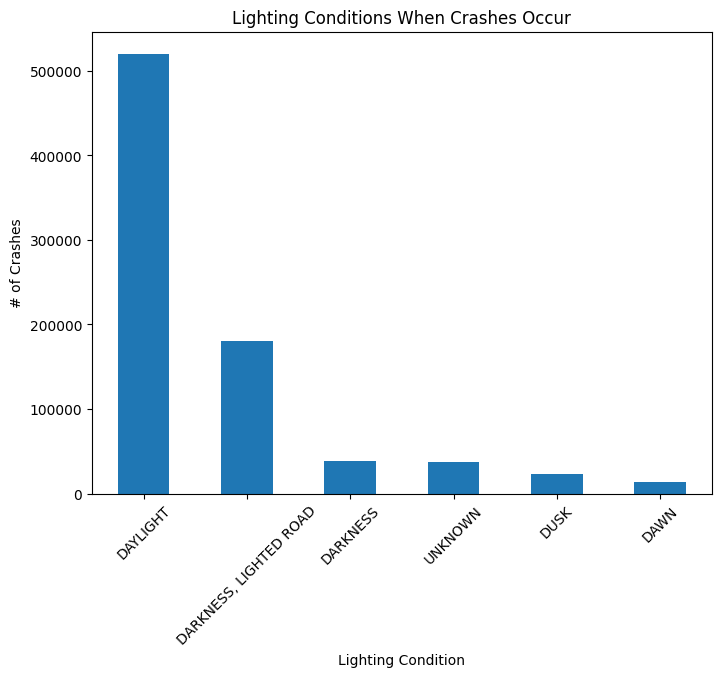

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading data from Prit's laptop
traffic_crashes = pd.read_csv('/Users/pritpatel/Downloads/CS/418/Group Project/Traffic_Crashes_-_Crashes_20240312.csv', low_memory=False)

l = traffic_crashes['LIGHTING_CONDITION']
lighting = l.value_counts()

# Create histogram
plt.figure(figsize=(8, 6))
lighting.plot(kind='bar')

plt.title('Lighting Conditions When Crashes Occur')
plt.xlabel('Lighting Condition')
plt.ylabel('# of Crashes')
plt.xticks(rotation=45)

## EDA of time

### Crash Frequency by Hour of Day

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
crashes_df = pd.read_csv('../data/chicago.csv')

In [13]:
crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])

C:\Users\juna7\AppData\Local\Temp\ipykernel_5564\3455780565.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])


In [14]:
crashes_df['DATE_POLICE_NOTIFIED'].head()

0   2023-09-05 19:05:00
1   2023-09-22 18:50:00
2   2023-07-29 14:45:00
3   2023-08-09 23:40:00
4   2023-08-18 12:55:00
Name: DATE_POLICE_NOTIFIED, dtype: datetime64[ns]

In [15]:
crashes_df['NOTIFIED_HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

In [16]:
hourly_crashes = crashes_df.groupby('NOTIFIED_HOUR').size()

In [17]:
print(hourly_crashes)

NOTIFIED_HOUR
0     15670
1     11955
2     10137
3      8055
4      6745
5      6860
6     11090
7     21851
8     36297
9     39729
10    42131
11    45022
12    45754
13    50459
14    52482
15    62497
16    68706
17    65111
18    57311
19    45493
20    32542
21    27045
22    22820
23    21030
dtype: int64


## Crash Frequency by Hour of Day

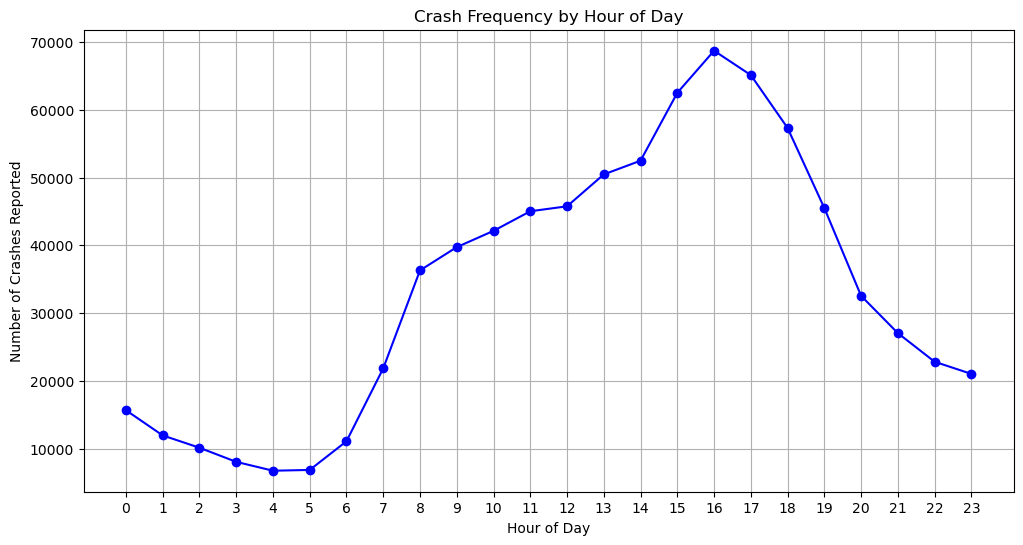

In [18]:
# Plotting
plt.figure(figsize=(12, 6))

# line plot
plt.plot(hourly_crashes.index, hourly_crashes.values, marker='o', linestyle='-', color='b')
plt.title('Crash Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes Reported')
plt.xticks(range(0, 24))
plt.grid(True)

## Crash Counts by Day of the Week

Crash Counts by Day of the Week:
DAY_NAME
Monday       117279
Tuesday      117464
Wednesday    115809
Thursday     116037
Friday       126704
Saturday     115447
Sunday        98052
Name: count, dtype: int64


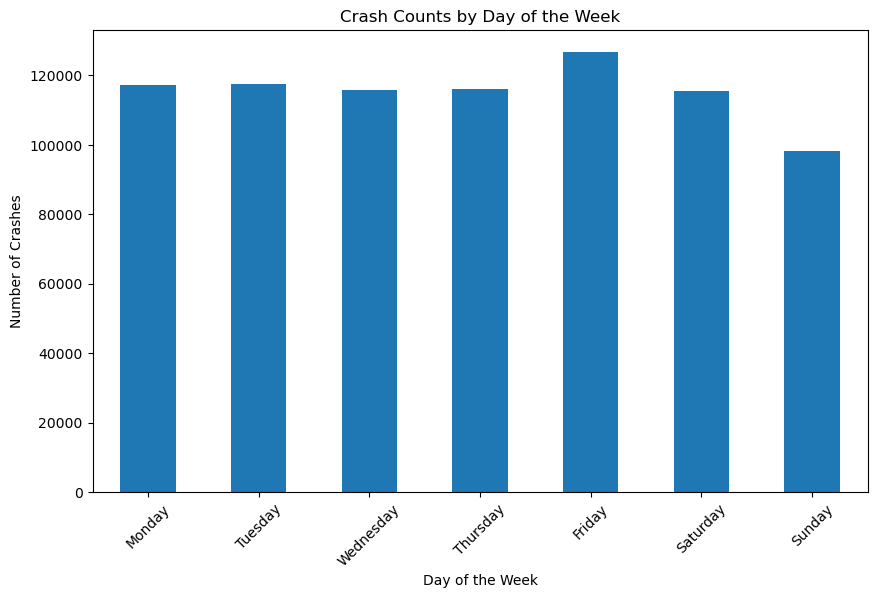

In [19]:
# Extract day of week and hour from 'DATE_POLICE_NOTIFIED'
crashes_df['DAY_OF_WEEK'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.dayofweek
crashes_df['HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

# Map the 'DAY_OF_WEEK' numerical values to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
crashes_df['DAY_NAME'] = crashes_df['DAY_OF_WEEK'].map(day_names)

# Display crash counts by day name
dayofweek_counts_named = crashes_df['DAY_NAME'].value_counts().reindex(day_names.values())
print("Crash Counts by Day of the Week:")
print(dayofweek_counts_named)

# Visualize crash counts by day of the week with day names
plt.figure(figsize=(10, 6))
dayofweek_counts_named.plot(kind='bar')
plt.title('Crash Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

# **Visualization 1 (Jackson Weisner)**

### Hypothesis 1:
Collisons in conditions other than 'CLEAR' are more likely to have fatal injuries.

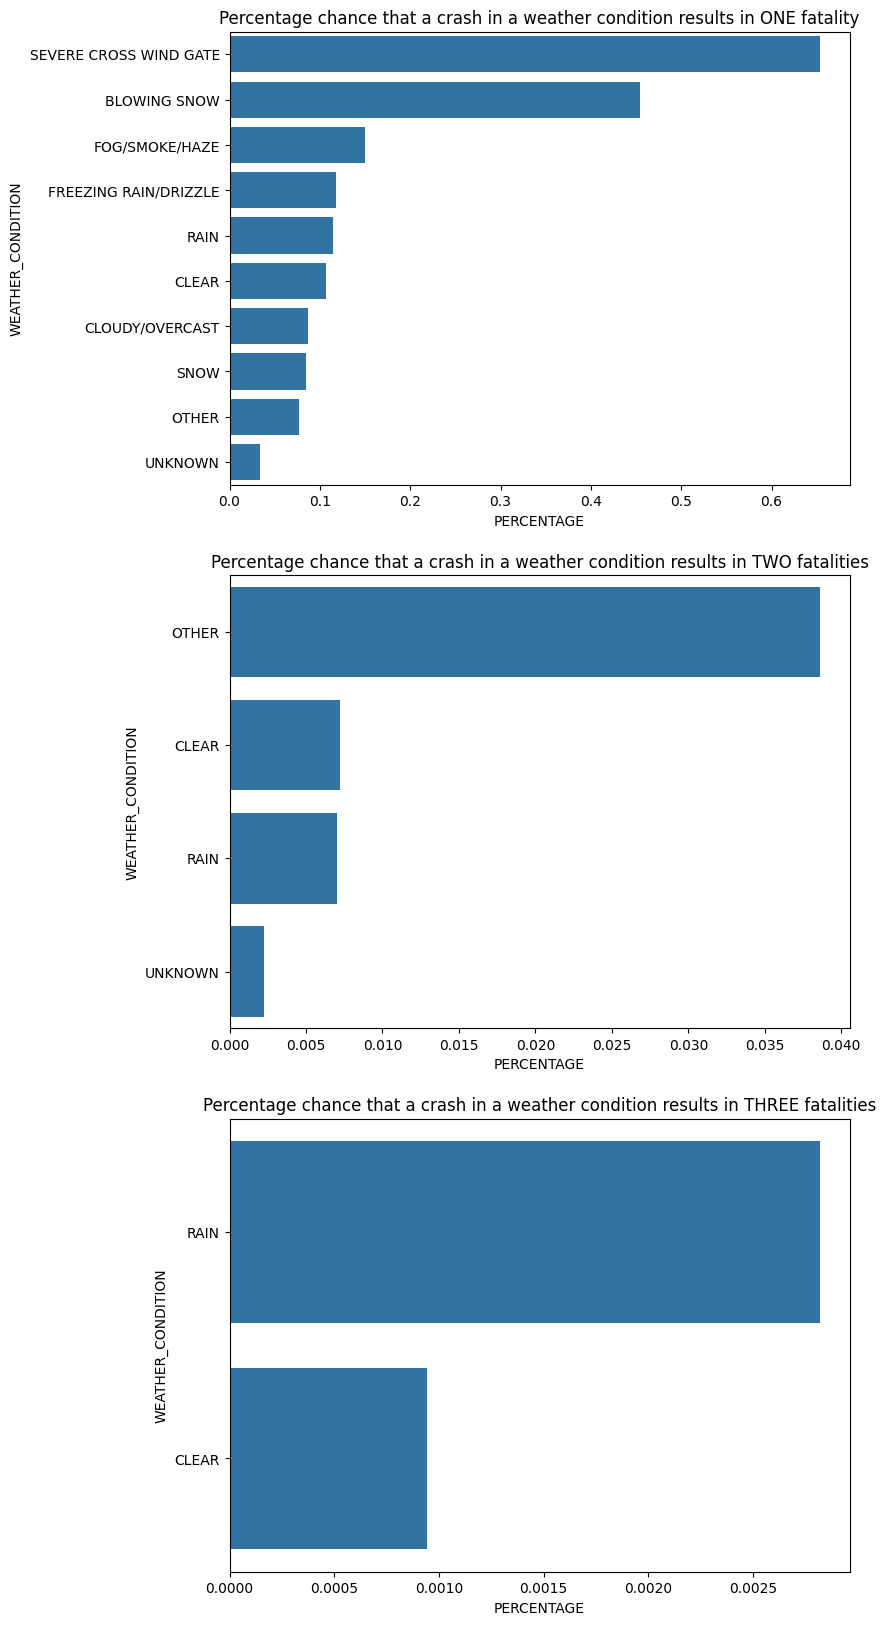

In [3]:
crash_weather = crashes_df.groupby('WEATHER_CONDITION')

total_per_condition = crash_weather['WEATHER_CONDITION'].count().to_frame()
total_per_condition = total_per_condition.rename(columns={'WEATHER_CONDITION':'TOTAL'}).reset_index()

def create_percentage_df(lambd):
    fatal_weather = crashes_df.loc[lambd(crashes_df['INJURIES_FATAL']), ['INJURIES_FATAL', 'WEATHER_CONDITION']].groupby('WEATHER_CONDITION').count()
    fatal_percenteges = pd.merge(total_per_condition, fatal_weather, how='outer', on='WEATHER_CONDITION')
    fatal_percenteges['PERCENTAGE'] = (fatal_percenteges['INJURIES_FATAL'] / fatal_percenteges['TOTAL']) * 100
    fatal_percenteges = fatal_percenteges.dropna().sort_values(by='PERCENTAGE', ascending=False)
    return fatal_percenteges

one_fatality = create_percentage_df(lambda v : v == 1.0)
two_fatalities = create_percentage_df(lambda v : v == 2.0)
three_fatalities = create_percentage_df(lambda v : v == 3.0)


figure, ax = plt.subplots(3, 1, figsize=(8,20))

plot_1 = sns.barplot(one_fatality, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[0], orient='h')
plot_2 = sns.barplot(two_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[1], orient='h')
plot_3 = sns.barplot(three_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[2], orient='h')

plot_1.set_title('Percentage chance that a crash in a weather condition results in ONE fatality')
plot_2.set_title('Percentage chance that a crash in a weather condition results in TWO fatalities')
plot_3.set_title('Percentage chance that a crash in a weather condition results in THREE fatalities')

plt.show()

## Conclusion:
From my analysis I observed the percent chance that a crash in a certain weather condition results in fatal injuries. The weather condition with the highest chance for one fatal injury is ‘SEVERE CROSS WIND GATE’ with approximately 0.6% chance, this is almost six times more than the percent chance for a single fatal injury in ‘CLEAR’ weather conditions. Out of the ten conditions the median conditions were ‘CLEAR’ and ‘RAIN’ when looking at the percent chance for a single fatal injury. 

The second graph looks at the percent chance that a crash in a certain weather condition results in two fatal injuries. The chances are about a factor of ten lower than the chance for a single fatality. Besides ‘OTHER’, ‘CLEAR’ is the most likely to result in two fatal injuries, which is interesting because it was not as likely compared to the other conditions in the previous graph.

The third graph looks at the percent chance that a crash in a certain weather condition results in three fatal injuries. This had less data to analyze, and the percent chance was another factor of 10 lower than the previous graph. But the ‘RAIN’ condition was much more likely to result in three fatal injuries than the ‘CLEAR’ condition.

According to my analysis, the ‘CLEAR’ condition is not the least dangerous condition in terms of fatal injuries, but it is also not the safest condition. This supports my hypothesis.


# **Visualization 2 (Prit Patel)**

### Hypothesis 2:

# **Visualization 3 (Mohammed Riaz)**

### Hypothesis 3:

# **Visualization 4 (Erica Hammond)**

### Hypothesis 4:

# **Visualization 5 (Junha Liu)**

### Hypothesis 5:

## Heatmap of Crash Frequency by Day of Week and Hour

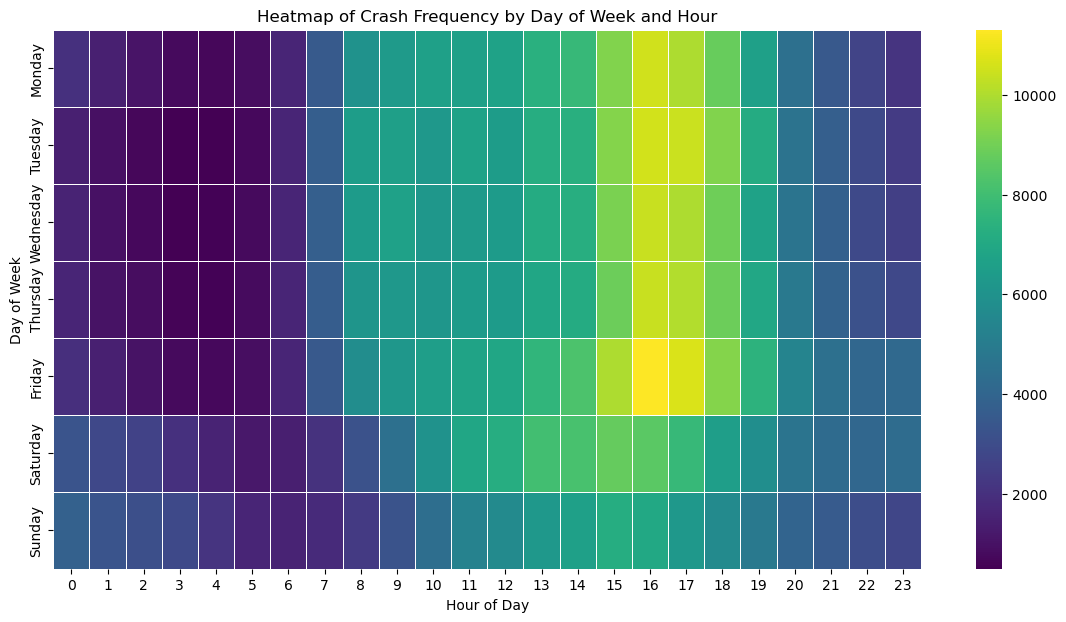

In [10]:
# Pivot table to aggregate crash counts by day name and hour
pivot_table = crashes_df.pivot_table(index='DAY_NAME', columns='HOUR', values='CRASH_RECORD_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crash Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

## Daily Crash Counts Over Time

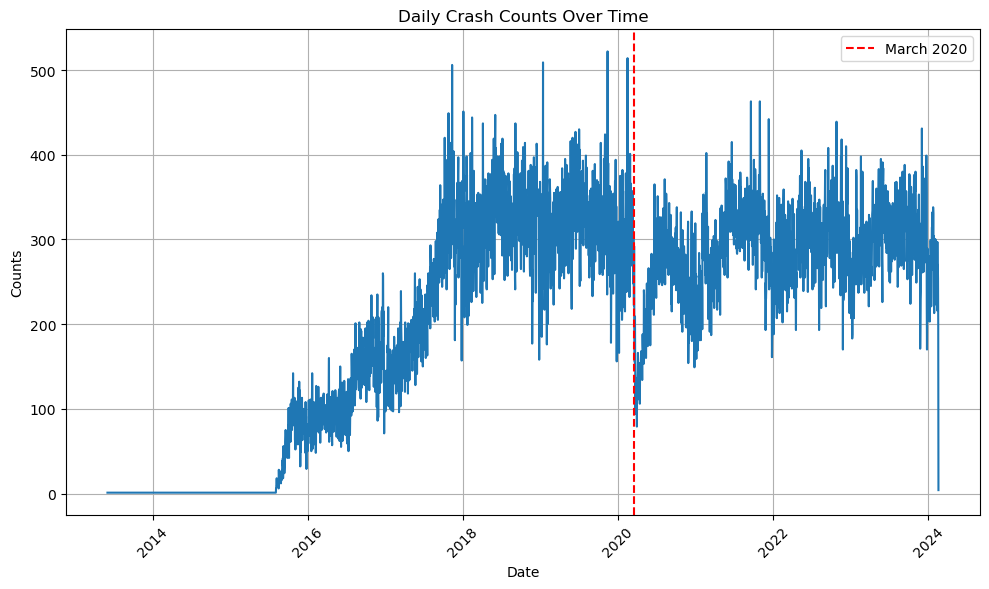

In [11]:
crashes_df['DATE'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.date
crashes_by_date = crashes_df.groupby('DATE').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plt.plot(crashes_by_date['DATE'], crashes_by_date['counts'])
plt.title('Daily Crash Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(True)

# Highlight March 2020
march_2020_start = pd.to_datetime('2020-03-15')
plt.axvline(x=march_2020_start, color='red', linestyle='--', label='March 2020')

plt.legend()
plt.tight_layout()
plt.show()

The data reveals a significant decrease in traffic crashes around March 2020, coinciding with the onset of COVID-19 related shutdowns and restrictions. This period marked a global shift towards remote work, reduced travel, and the temporary closure of many workplaces, leading to substantially less traffic on the roads. The reduced traffic volume directly contributed to fewer traffic collisions, highlighting how changes in societal behavior and mobility patterns can have a pronounced impact on road safety. This observation underscores the importance of considering external factors, such as public health crises, in traffic and urban planning to enhance road safety outcomes.

# **Machine Learning analysis 1**

### Hypothesis 1:

# **Machine Learning analysis 2**

### Hypothesis 2:

# **Reflection**

(reflection)